In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sys

In [2]:
# # Load the Wine Dataset
df_wine = pd.read_csv("data/winemag-data-130k-v2.csv", encoding = 'utf8')

In [3]:
df_wine.head(3)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [4]:
#df_wine = df_wine.drop('points', 1)

In [5]:
print(df_wine.dtypes)

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object


In [6]:
# Finding the number of rows with NULL values
df_wine.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
# DROP region_2 column since most of the records NULL and we have region_1
df_wine = df_wine.drop('region_2', 1)

In [8]:
# DROP rows with NULL values
df_wine=df_wine.dropna()
df_wine.shape

(52106, 13)

In [9]:
df_wine['price'].describe()

count    52106.000000
mean        39.744847
std         36.662203
min          4.000000
25%         20.000000
50%         30.000000
75%         50.000000
max       2013.000000
Name: price, dtype: float64

# Convert categorical COUNTRY column to Numeric

In [10]:
df_wine['country'].unique()

array(['US', 'Spain', 'Italy', 'France', 'Argentina', 'Australia',
       'Canada'], dtype=object)

In [11]:
df_country = df_wine.country.str.get_dummies() # get the pivot of the country attribte
df_country.columns = ['from_' + col for col in df_country.columns] # naming the columns
df_wine = pd.concat([df_wine, df_country], axis=1) # combine main dataframe with country matrix dataframe
df_wine = df_wine.drop('country', axis=1) # drop the country attribute since different attributes per country value
df_wine.head(3)

,Unnamed: 0,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery,from_Argentina,from_Australia,from_Canada,from_France,from_Italy,from_Spain,from_US
4,4,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0,0,0,0,0,0,1
5,5,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0,0,0,0,0,1,0
6,6,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0,0,0,0,1,0,0


In [12]:
print(df_wine.dtypes)

Unnamed: 0                 int64
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
from_Argentina             int64
from_Australia             int64
from_Canada                int64
from_France                int64
from_Italy                 int64
from_Spain                 int64
from_US                    int64
dtype: object


In [13]:
# DEFINE X and Y VARIABLES
df_X = df_wine.loc[:, 'from_Argentina':'from_US']
df_X = pd.concat([df_wine.price, df_X], axis=1)
df_Y = df_wine[['points']]
print(df_X.shape)


(52106, 8)


In [14]:
# devide the dataframe for training and testing 
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.20)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(41684, 8) (41684, 1)
(10422, 8) (10422, 1)


In [15]:
# Clean test data
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

# ############################ REMOVE OUTLIERS FROM TESTING ##########################
print("test data with outliers", X_test.shape, y_test.shape)
# clean prices from testing
test_prices_wo_outliers = reject_outliers(X_test.values)
# remove points from test set if price was an outlier
min_price = min(test_prices_wo_outliers)
max_price = max(test_prices_wo_outliers)

test_data = pd.concat([X_test, y_test], axis=1)
test_data_clean = test_data.drop(test_data[test_data.price < min_price].index)
test_data_clean = test_data_clean.drop(test_data_clean[test_data_clean.price > max_price].index)

print(test_data_clean.shape)

X_test = test_data_clean[test_data_clean.columns[:-1].tolist()]
y_test = pd.DataFrame(test_data_clean['points'])
print("test data without outliers", X_test.shape, y_test.shape)
#######################################################################################
print(type(y_test))


test data with outliers (10422, 8) (10422, 1)
(6935, 9)
test data without outliers (6935, 8) (6935, 1)
<class 'pandas.core.frame.DataFrame'>


In [16]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

coeficient:  [[ 0.03442411 -1.22236625  0.3065206   0.74710222  0.29533927  0.13560818
  -0.97831139  0.71610737]]
intercept:  [87.40719595]


/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


(80, 150)

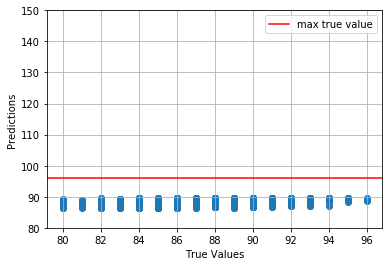

In [17]:
# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
max_y_predictions = int(max(y_predictions))
min_y_predictions = int(min(y_predictions))
max_y_true = int(max(y_test.points))
min_y_true = int(min(y_test.points))
plt.axhline(max_y_true,label='max true value', color="red")
plt.legend()
plt.grid()
plt.ylim([80,150])

In [18]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))


Accuracy: 0.11274647444526485
RMSE: 2.4948208347493868
MAE: 2.003296901769019


<h3>Regression without outliers</h3>

In [19]:
print(type(X_train))
# remove outliers from training data
print("training data with outliers", X_train.shape, y_train.shape)

training_prices_wo_outliers = reject_outliers(X_train['price'].values)
# remove points from test set if price was an outlier
min_price = min(training_prices_wo_outliers)
max_price = max(training_prices_wo_outliers)


training_data = pd.concat([X_train, y_train], axis=1)
training_clean = training_data.drop(training_data[training_data.price < min_price].index)
training_clean = training_clean.drop(training_clean[training_clean.price > max_price].index)

X_train = training_clean[training_clean.columns[:-1].tolist()]
y_train = training_clean['points'].values.reshape(-1, 1)
print("training data without outliers", X_train.shape, y_train.shape)


# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_predictions = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

<class 'pandas.core.frame.DataFrame'>
training data with outliers (41684, 8) (41684, 1)
training data without outliers (40422, 8) (40422, 1)
coeficient:  [[ 0.07035059 -0.93983443  0.35811157  0.47573756  0.31389512 -0.01764491
  -0.70316983  0.51290492]]
intercept:  [86.23010817]


(80, 150)

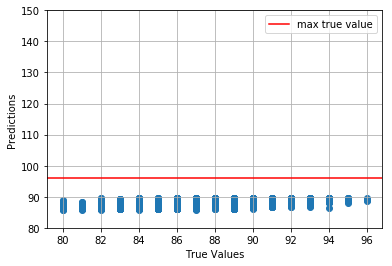

In [20]:
# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
max_y_predictions = int(max(y_predictions))
min_y_predictions = int(min(y_predictions))
max_y_true = int(max(y_test.points))
min_y_true = int(min(y_test.points))
plt.axhline(max_y_true,label='max true value', color="red")
plt.legend()
plt.grid()
plt.ylim([80,150])


In [21]:
# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))


Accuracy: 0.19624597597526972
RMSE: 2.3745267997133928
MAE: 1.8963447407477476


<h3>Information gain</h3>

In [22]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_train, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')
print(embeded_rf_feature)

/Users/roxana/.virtualenvs/dojo3/lib/python3.7/site-packages/sklearn/feature_selection/from_model.py:197: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


3 selected features
['price', 'from_Italy', 'from_US']


In [26]:
# pd.concat([X_train, y_train], axis=1)
# # selected_features_X_train = pd.concat(X_train.price.values, X_train.from_Italy.values)
print(type(X_train))
print(type(y_train))
selected_features_X_train = X_train[['price','from_Italy', 'from_US']]
selected_features_X_t = X_train[['price','from_Italy', 'from_US']]
print(type(selected_features_X_train))


# apply linear regression again
lm = linear_model.LinearRegression()
model = lm.fit(selected_features_X_train, y_train)
y_predictions = lm.predict(X_test)

w = model.coef_ # parameters of model
b = model.intercept_ #intercept of model

print("coeficient: ", w)
print("intercept: ", b)

# Plot the results
plt.scatter(y_test, y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
max_y_predictions = int(max(y_predictions))
min_y_predictions = int(min(y_predictions))
max_y_true = int(max(y_test.points))
min_y_true = int(min(y_test.points))
plt.axhline(max_y_true,label='max true value', color="red")
plt.legend()
plt.grid()
plt.ylim([80,150])

# Accuracy score
print ('Accuracy:', model.score(X_test, y_test))
# Root mean squared error (RMSE)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))
# Mean absolute error (MAE)
print('MAE:', metrics.mean_absolute_error(y_test, y_predictions))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


ValueError: shapes (6935,8) and (3,1) not aligned: 8 (dim 1) != 3 (dim 0)